# Treinamento CIS - 3º Período (Clusterização)

1. Visualize o scatteplot em matriz com hue = “Gender”. Dá para notar alguma
diferença? Se sim, qual e por quê?

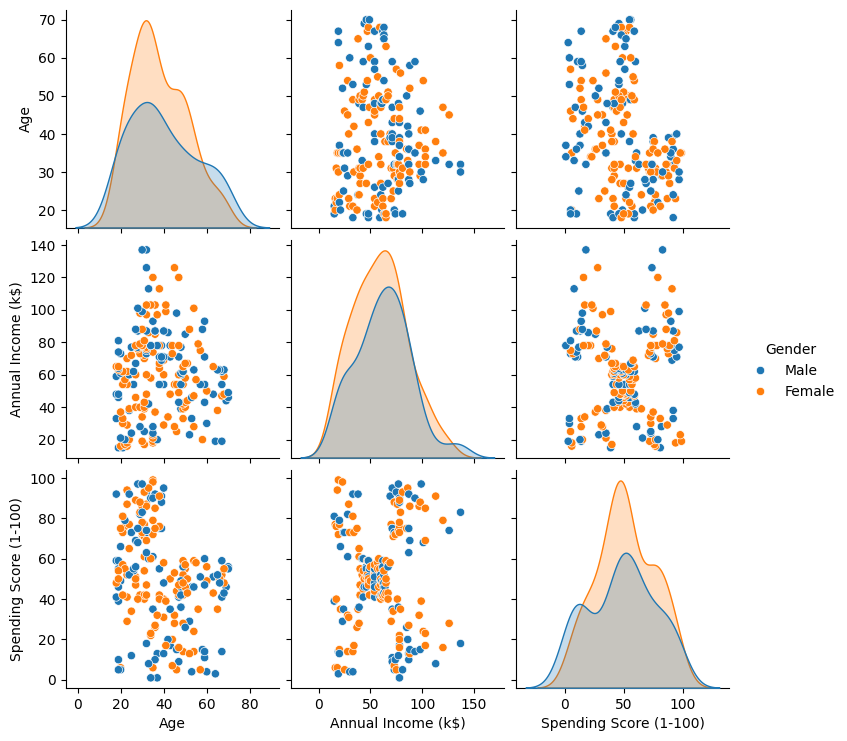

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

customers_path = './data/Mall_Customers.csv'
customers = pd.read_csv(customers_path)

customers = customers.drop(columns=['CustomerID'])
sns.pairplot(customers, hue='Gender')
plt.show()



2. Crie um DataFrame apenas com colunas Annual Income e Spending Score.

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


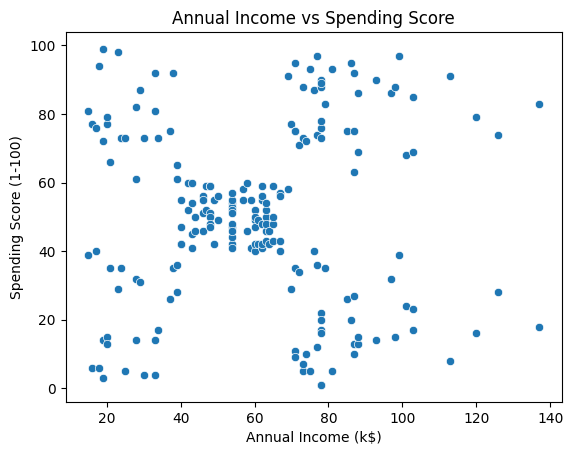

In [30]:
selected_columns = customers[['Annual Income (k$)', 'Spending Score (1-100)']]
print(selected_columns.head())

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=selected_columns)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

3. Importe o K-means

In [31]:
from sklearn.cluster import KMeans

4. Crie o modelo em cluster padrão, sem especificar a quantidade K de clusters


In [38]:
selected_columns = customers[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(random_state=0)

kmeans.fit(selected_columns)


KMeans(random_state=0)

In [39]:
kmeans.labels_

array([3, 4, 7, 4, 3, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 3, 4, 3, 4, 3, 4,
       7, 4, 7, 4, 3, 4, 3, 4, 7, 4, 7, 4, 7, 4, 7, 4, 3, 4, 3, 4, 3, 6,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 0, 0, 6, 6, 6, 6,
       6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 5, 5,
       5, 5], dtype=int32)

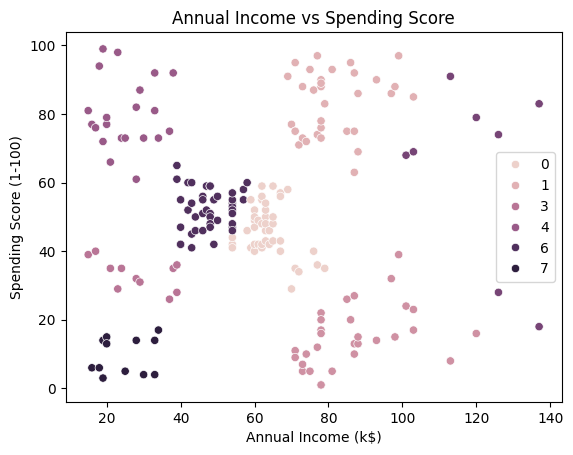

In [40]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=kmeans.labels_ ,data=selected_columns)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

5. Crie uma curva de cotovelo. Qual seria o número ideal de clusters?

In [44]:
k_values = []
inertias = []

for i in range(1,15):
    kmeans_i = KMeans(n_clusters=i,random_state=0).fit(selected_columns)
    k_values.append(i)
    inertias.append(kmeans_i.inertia_)

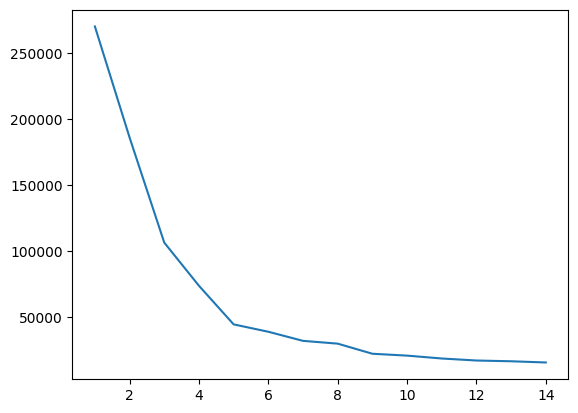

In [45]:
# Relação entre inércia e K
fig,ax = plt.subplots()

ax.plot(k_values,inertias)

plt.show()